In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('processing_file.csv')
df.head()

,age,trestbps,chol,thalach,oldpeak,ca,thal,target,sex_female,sex_male,...,fbs_higher than 120,fbs_lower than 120,restecg_average,restecg_dangerous,restecg_normal,exang_No,exang_True,slope_downslope,slope_slope,slope_upslope
0,63,145,233,150,2.3,0,1,1,0,1,...,1,0,0,0,1,1,0,0,0,1
1,37,130,250,187,3.5,0,2,1,0,1,...,0,1,1,0,0,1,0,0,0,1
2,41,130,204,172,1.4,0,2,1,1,0,...,0,1,0,0,1,1,0,1,0,0
3,56,120,236,178,0.8,0,2,1,0,1,...,0,1,1,0,0,1,0,1,0,0
4,57,120,354,163,0.6,0,2,1,1,0,...,0,1,1,0,0,0,1,1,0,0


In [5]:
X = df.drop('target',axis = 1)
X.head()

,age,trestbps,chol,thalach,oldpeak,ca,thal,sex_female,sex_male,cp_一般,...,fbs_higher than 120,fbs_lower than 120,restecg_average,restecg_dangerous,restecg_normal,exang_No,exang_True,slope_downslope,slope_slope,slope_upslope
0,63,145,233,150,2.3,0,1,0,1,0,...,1,0,0,0,1,1,0,0,0,1
1,37,130,250,187,3.5,0,2,0,1,0,...,0,1,1,0,0,1,0,0,0,1
2,41,130,204,172,1.4,0,2,1,0,1,...,0,1,0,0,1,1,0,1,0,0
3,56,120,236,178,0.8,0,2,0,1,1,...,0,1,1,0,0,1,0,1,0,0
4,57,120,354,163,0.6,0,2,1,0,0,...,0,1,1,0,0,0,1,1,0,0


In [7]:
y = df['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [9]:
X_train.shape

(212, 23)

In [10]:
y_train.shape

(212,)

In [11]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth = 5,n_estimators  = 100,random_state = 5,)
rfc = rfc.fit(X_train,y_train)
predict = rfc.predict(X_test)


In [12]:
predict

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0], dtype=int64)

### 可视化索引为7的决策树

In [14]:
estimator = rfc.estimators_[7]
estimator

DecisionTreeClassifier(max_depth=5, max_features='auto',
                       random_state=2059200585)

#### 可视化决策树

In [25]:
## 将特征值转化为字符串
feature_names = X_train.columns


# y_train_str由y_train,变形而来，所以肯定是Series类型
y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'
y_train_str = y_train_str.values

In [31]:
from sklearn.tree import export_graphviz

export_graphviz(estimator,out_file = 'tree.dot',
               feature_names = feature_names,
               class_names = y_train_str,
               rounded = True,proportion = True,
               label = 'root',
               precision = 2,
               filled = True)

In [34]:
from subprocess import call
call(['dot','-Tpng','tree.dot','-o','tree.png','-Gdpi = 600'])

from IPython.display import Image
Image(filename = 'tree.png')

FileNotFoundError: [WinError 2] 系统找不到指定的文件。

In [35]:
import eli5

ModuleNotFoundError: No module named 'eli5'

#### 特征重要性分析

In [36]:
rfc.feature_importances_

array([0.06541101, 0.04592001, 0.04270701, 0.12319348, 0.10460575,
       0.07947125, 0.08324916, 0.0365178 , 0.02179583, 0.01094617,
       0.02863431, 0.00665719, 0.14100573, 0.00471227, 0.00352513,
       0.01066981, 0.00044585, 0.0142249 , 0.04994128, 0.05102985,
       0.0367711 , 0.03623286, 0.00233225])

In [41]:
import numpy as np

In [46]:
print('特征排序：')
feature_names = X_test.columns
feature_importance = rfc.feature_importances_
indices = np.argsort(feature_importance)[::-1]

for index in indices:
    print('{},重要度为：{}'.format(feature_names[index],feature_importance[index]))

特征排序：
cp_普通,重要度为：0.14100572933233213
thalach,重要度为：0.12319348340526115
oldpeak,重要度为：0.10460574949398603
thal,重要度为：0.0832491625573472
ca,重要度为：0.07947125460131896
age,重要度为：0.06541100710727539
exang_True,重要度为：0.051029847793968706
exang_No,重要度为：0.049941277258180275
trestbps,重要度为：0.04592000614304479
chol,重要度为：0.04270701320191631
slope_downslope,重要度为：0.03677110242865363
sex_female,重要度为：0.03651779595732859
slope_slope,重要度为：0.036232859293020205
cp_严重,重要度为：0.02863431321483526
sex_male,重要度为：0.021795827433259432
restecg_normal,重要度为：0.01422490053321715
cp_一般,重要度为：0.010946168088012433
restecg_average,重要度为：0.010669808552297171
cp_加重,重要度为：0.00665719343849067
fbs_higher than 120,重要度为：0.00471227102113484
fbs_lower than 120,重要度为：0.0035251327756547026
slope_upslope,重要度为：0.0023322462297364855
restecg_dangerous,重要度为：0.00044585013972857807


In [48]:
feature_importance[indices]

array([0.14100573, 0.12319348, 0.10460575, 0.08324916, 0.07947125,
       0.06541101, 0.05102985, 0.04994128, 0.04592001, 0.04270701,
       0.0367711 , 0.0365178 , 0.03623286, 0.02863431, 0.02179583,
       0.0142249 , 0.01094617, 0.01066981, 0.00665719, 0.00471227,
       0.00352513, 0.00233225, 0.00044585])

([<matplotlib.axis.XTick at 0x2b84c848d00>,
 [Text(0, 0, 'cp_普通'),
  Text(1, 0, 'thalach'),
  Text(2, 0, 'oldpeak'),
  Text(3, 0, 'thal'),
  Text(4, 0, 'ca'),
  Text(5, 0, 'age'),
  Text(6, 0, 'exang_True'),
  Text(7, 0, 'exang_No'),
  Text(8, 0, 'trestbps'),
  Text(9, 0, 'chol'),
  Text(10, 0, 'slope_downslope'),
  Text(11, 0, 'sex_female'),
  Text(12, 0, 'slope_slope'),
  Text(13, 0, 'cp_严重'),
  Text(14, 0, 'sex_male'),
  Text(15, 0, 'restecg_normal'),
  Text(16, 0, 'cp_一般'),
  Text(17, 0, 'restecg_average'),
  Text(18, 0, 'cp_加重'),
  Text(19, 0, 'fbs_higher than 120'),
  Text(20, 0, 'fbs_lower than 120'),
  Text(21, 0, 'slope_upslope'),
  Text(22, 0, 'restecg_dangerous')])

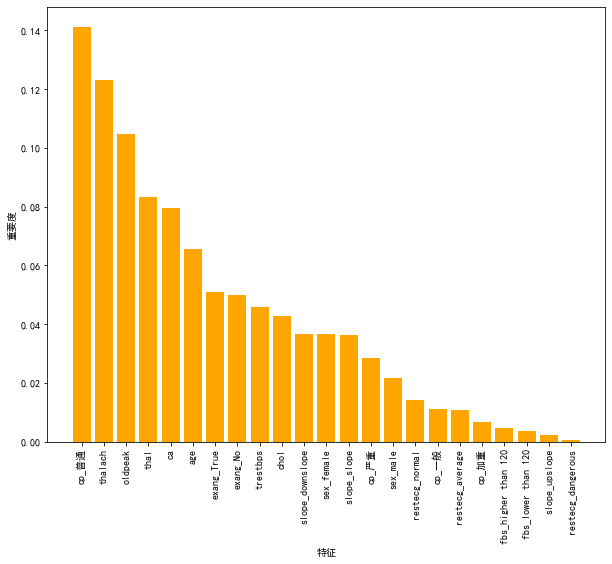

In [59]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize = (10,8))
plt.xlabel('特征')
plt.ylabel('重要度')
plt.bar(range(len(feature_importance)),feature_importance[indices],color ='orange')

labels = feature_names[indices]
plt.xticks(range(len(feature_importance)),labels,rotation = 90)

In [49]:
feature_names[indices]

Index(['cp_普通', 'thalach', 'oldpeak', 'thal', 'ca', 'age', 'exang_True',
       'exang_No', 'trestbps', 'chol', 'slope_downslope', 'sex_female',
       'slope_slope', 'cp_严重', 'sex_male', 'restecg_normal', 'cp_一般',
       'restecg_average', 'cp_加重', 'fbs_higher than 120', 'fbs_lower than 120',
       'slope_upslope', 'restecg_dangerous'],
      dtype='object')

##  进行预测
#### 筛选出一个未知样本

In [60]:
X_test.iloc[2]

age                     65.0
trestbps               160.0
chol                   360.0
thalach                151.0
oldpeak                  0.8
ca                       0.0
thal                     2.0
sex_female               1.0
sex_male                 0.0
cp_一般                    0.0
cp_严重                    1.0
cp_加重                    0.0
cp_普通                    0.0
fbs_higher than 120      0.0
fbs_lower than 120       1.0
restecg_average          0.0
restecg_dangerous        0.0
restecg_normal           1.0
exang_No                 1.0
exang_True               0.0
slope_downslope          1.0
slope_slope              0.0
slope_upslope            0.0
Name: 39, dtype: float64

In [62]:
Sample = np.array(X_test.iloc[2]).reshape(1,-1)
Sample.shape

(1, 23)

###   预测该未知样本

### 定性预测

In [63]:
rfc.predict(Sample)   #定性预测

array([1], dtype=int64)

####  定量评估

In [65]:
rfc.predict_proba(Sample)

array([[0.18343017, 0.81656983]])

##### 切片，患心脏病的概率

In [67]:
rfc.predict_proba(Sample)[:,1]

array([0.81656983])

#### 混淆矩阵

In [69]:
y_predict = rfc.predict(X_test)

In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix_model = confusion_matrix(y_test,y_predict)
confusion_matrix_model

array([[35, 11],
       [ 9, 36]], dtype=int64)

#### 绘制混淆矩阵

In [80]:
import itertools

def plot_confusion_matrix(cm, labels_name, title):
#     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]    # 归一化
    plt.imshow(cm, interpolation='nearest',cmap = plt.cm.Greens)    # 在特定的窗口上显示图像
    plt.title(title)    # 图像标题
    plt.colorbar()
    num_local = np.array(range(len(labels_name)))    
    plt.xticks(num_local, labels_name, rotation=90)    # 将标签印在x轴坐标上
    plt.yticks(num_local, labels_name)    # 将标签印在y轴坐标上
    plt.ylabel('True label')    
    plt.xlabel('Predicted label')
    
    threshold = cm.max() / len(cm)
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment = 'center',
                color = 'white' if cm[i,j] > threshold else 'pink',
                fontsize = 25)
        
    plt.tight_layout()    #自动调整函数
    plt.show()



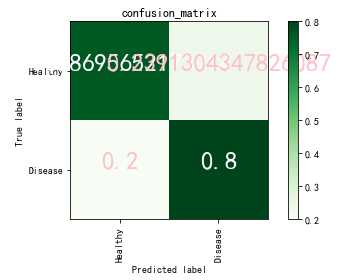

In [81]:
plot_confusion_matrix(confusion_matrix_model,['Healthy','Disease'],'confusion_matrix')

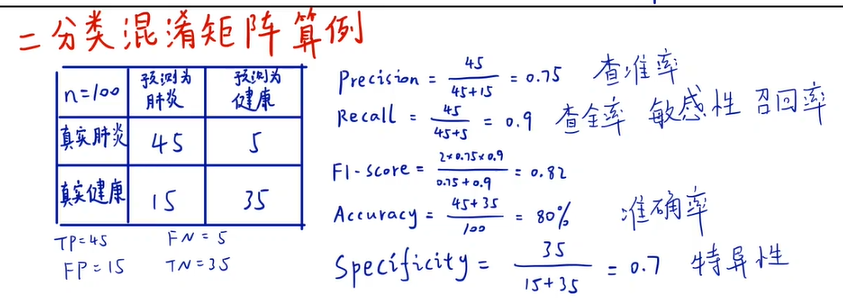

In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict,target_names = ['Healthy','Disease']))

              precision    recall  f1-score   support

     Healthy       0.80      0.76      0.78        46
     Disease       0.77      0.80      0.78        45

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91



#### ROC曲线

In [85]:
y_predict_quant = rfc.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_curve,auc

fpr,tpr,thresholds = roc_curve(y_test,y_predict_quant)

In [86]:
fpr

array([0.        , 0.        , 0.        , 0.02173913, 0.02173913,
       0.04347826, 0.04347826, 0.10869565, 0.10869565, 0.13043478,
       0.13043478, 0.15217391, 0.15217391, 0.17391304, 0.17391304,
       0.19565217, 0.19565217, 0.2173913 , 0.2173913 , 0.23913043,
       0.23913043, 0.32608696, 0.32608696, 0.41304348, 0.41304348,
       0.67391304, 0.67391304, 1.        ])

In [87]:
tpr

array([0.        , 0.02222222, 0.22222222, 0.22222222, 0.4       ,
       0.4       , 0.48888889, 0.48888889, 0.53333333, 0.53333333,
       0.64444444, 0.64444444, 0.66666667, 0.66666667, 0.68888889,
       0.68888889, 0.71111111, 0.71111111, 0.75555556, 0.75555556,
       0.86666667, 0.86666667, 0.91111111, 0.91111111, 0.97777778,
       0.97777778, 1.        , 1.        ])

In [88]:
thresholds

array([1.97341081, 0.97341081, 0.91799435, 0.9170016 , 0.86118158,
       0.85425593, 0.81656983, 0.79424447, 0.75155565, 0.74211858,
       0.68850126, 0.63761279, 0.63513171, 0.62697331, 0.62692743,
       0.61005839, 0.59746725, 0.59118318, 0.56784187, 0.55234479,
       0.483436  , 0.44340006, 0.43885942, 0.39718025, 0.37163367,
       0.16685357, 0.16004934, 0.00832291])

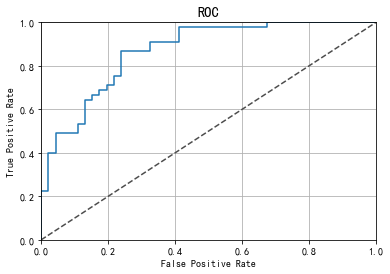

In [89]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],ls = '--',c = '.3')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()

In [91]:
auc(fpr,tpr)

0.8681159420289856